In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import nltk
!pip install sklearn-crfsuite
import sklearn_crfsuite
from sklearn_crfsuite import metrics
nltk.download('treebank')
corpus_tutorial = nltk.corpus.treebank.tagged_sents()
import pandas as pd
import ast
import nltk
from sklearn.model_selection import train_test_split
from sklearn_crfsuite import metrics
import sklearn_crfsuite

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.7 MB/s eta 0:00:00


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


In [ ]:
import pandas as pd
import ast

df = pd.read_csv('/content/drive/MyDrive/Datasets/dataset.csv')
corpus = []
for tagged_text in df['tagged_text']:
    tagged_sentence = ast.literal_eval(tagged_text)
    corpus.append(tagged_sentence)

print(corpus[:5])

[[('Pan', 'PropN'), ('Karsa', 'PropN'), ('ajaka', 'Prep'), ('pianakne', 'Verb'), ('muani', 'Noun'), ('nanggap', 'Noun'), ('upah', 'Part'), ('ngae', 'Verb'), ('semer', 'Noun'), ('di', 'Prep'), ('sisin', 'Noun'), ('rurunge', 'Part'), ('gede', 'Adj')], [('Uli', 'Prep'), ('semeng', 'Noun'), ('maka', 'Noun'), ('sanja', 'Noun'), ('ia', 'Pronoun'), ('ajaka', 'Prep'), ('dadua', 'Num'), ('tusing', 'Adj'), ('mareren', 'Adj'), ('magae', 'Verb'), ('sajawaning', 'Noun'), ('di', 'Prep'), ('nuju', 'Noun'), ('madaarne', 'Noun')], [('Kenehne', 'Noun'), ('apang', 'Prep'), ('gegaene', 'Verb'), ('enggal', 'Noun'), ('pragat', 'Part'), ('tur', 'Prep'), ('lantas', 'Adj'), ('nampi', 'Verb'), ('upahne', 'Noun')], [('Telung', 'Noun'), ('dina', 'Part'), ('ia', 'Pronoun'), ('magae', 'Verb'), ('tan', 'Adj'), ('parerenan', 'Verb'), ('semere', 'Noun'), ('suba', 'Adj'), ('dalem', 'Part'), ('ngantiang', 'Verb'), ('pragat', 'Noun')], [('Kendelne', 'Det'), ('tara', 'PropN'), ('bakat', 'PropN'), ('ban', 'PropN'), ('nutur

In [ ]:
all_words = [word for sentence in corpus for word, tag in sentence]

distinct_words = set(all_words)

print(f"Number of distinct words: {len(distinct_words)}")

Number of distinct words: 12902


In [ ]:
import nltk
from sklearn.model_selection import train_test_split
from sklearn_crfsuite import metrics
import sklearn_crfsuite
import joblib
import matplotlib.pyplot as plt
import numpy as np
from nltk.translate.bleu_score import sentence_bleu
import pandas as pd
import ast

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/dataset.csv')
corpus = []
for tagged_text in df['tagged_text']:
    tagged_sentence = ast.literal_eval(tagged_text)
    corpus.append(tagged_sentence)

# Fungsi untuk menghitung fitur per kata
def word_features(sentence, i):
    word = sentence[i][0]
    features = {
        'word': word,
        'is_first': i == 0,
        'is_last': i == len(sentence) - 1,
        'is_capitalized': word[0].upper() == word[0],
        'is_all_caps': word.upper() == word,
        'is_all_lower': word.lower() == word,
        'prefix-1': word[0],
        'prefix-2': word[:2],
        'prefix-3': word[:3],
        'suffix-1': word[-1],
        'suffix-2': word[-2:],
        'suffix-3': word[-3:],
        'prev_word': '' if i == 0 else sentence[i-1][0],
        'next_word': '' if i == len(sentence)-1 else sentence[i+1][0],
        'has_hyphen': '-' in word,
        'is_numeric': word.isdigit(),
        'capitals_inside': word[1:].lower() != word[1:],
        'word_shape': ''.join(['X' if c.isupper() else 'x' if c.islower() else 'd' if c.isdigit() else '-' for c in word]),
        'prev_word_is_capitalized': '' if i == 0 else sentence[i-1][0][0].isupper(),
    }
    return features

# Membuat dataset fitur dan label
X = [[word_features(sentence, i) for i in range(len(sentence))] for sentence in corpus]
y = [[tag for _, tag in sentence] for sentence in corpus]

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter yang akan diuji
c1_values = [0.01, 0.1, 1.0]
c2_values = [0.01, 0.1, 1.0]

best_crf = None
best_accuracy = 0.0
results = []

# Loop melalui berbagai kombinasi parameter
for c1 in c1_values:
    for c2 in c2_values:
        print(f"Training model dengan c1={c1}, c2={c2}...")

        crf = sklearn_crfsuite.CRF(
            algorithm='lbfgs',
            c1=c1,
            c2=c2,
            max_iterations=100,
            all_possible_transitions=True
        )

        crf.fit(X_train, y_train)

        y_pred = crf.predict(X_test)

        accuracy = metrics.flat_accuracy_score(y_test, y_pred)
        print(f"Accuracy untuk c1={c1}, c2={c2}: {accuracy:.4f}")

        results.append((c1, c2, accuracy))

        # Simpan model terbaik
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_crf = crf
            joblib.dump(best_crf, "best_crf_model.pkl")
            print(f"Model baru disimpan dengan akurasi terbaik: {best_accuracy:.4f}")

print(f"\nModel terbaik menggunakan c1={best_crf.c1}, c2={best_crf.c2} dengan akurasi: {best_accuracy:.4f}")



Training model dengan c1=0.01, c2=0.01...
Accuracy untuk c1=0.01, c2=0.01: 0.8763
Model baru disimpan dengan akurasi terbaik: 0.8763
Training model dengan c1=0.01, c2=0.1...
Accuracy untuk c1=0.01, c2=0.1: 0.8750
Training model dengan c1=0.01, c2=1.0...
Accuracy untuk c1=0.01, c2=1.0: 0.8630
Training model dengan c1=0.1, c2=0.01...
Accuracy untuk c1=0.1, c2=0.01: 0.8980
Model baru disimpan dengan akurasi terbaik: 0.8980
Training model dengan c1=0.1, c2=0.1...
Accuracy untuk c1=0.1, c2=0.1: 0.8831
Training model dengan c1=0.1, c2=1.0...
Accuracy untuk c1=0.1, c2=1.0: 0.8640
Training model dengan c1=1.0, c2=0.01...
Accuracy untuk c1=1.0, c2=0.01: 0.9104
Model baru disimpan dengan akurasi terbaik: 0.9104
Training model dengan c1=1.0, c2=0.1...
Accuracy untuk c1=1.0, c2=0.1: 0.8962
Training model dengan c1=1.0, c2=1.0...
Accuracy untuk c1=1.0, c2=1.0: 0.8615

Model terbaik menggunakan c1=1.0, c2=0.01 dengan akurasi: 0.9104


In [ ]:
# Evaluasi tambahan
classification_report = metrics.flat_classification_report(y_test, y_pred, digits=4)
print("\nClassification Report:")
print(classification_report)

# Evaluasi dengan BLEU
bleu_scores = []
for true, pred in zip(y_test, y_pred):
    bleu_scores.append(sentence_bleu([true], pred))

average_bleu = sum(bleu_scores) / len(bleu_scores)
print(f"\nAverage BLEU Score: {average_bleu:.4f}")


Classification Report:
              precision    recall  f1-score   support

         Adj     0.9129    0.8339    0.8716      1433
         Det     0.9687    0.9580    0.9633      1001
        Noun     0.8577    0.8784    0.8680      4935
         Num     0.8529    0.7073    0.7733        41
        Part     0.7849    0.8069    0.7958      2325
        Prep     0.9515    0.9137    0.9322      1611
     Pronoun     0.9320    0.8960    0.9137      1010
       PropN     0.7461    0.8066    0.7752      1122
        Verb     0.8470    0.8377    0.8423      2723

    accuracy                         0.8615     16201
   macro avg     0.8727    0.8487    0.8595     16201
weighted avg     0.8634    0.8615    0.8621     16201


Average BLEU Score: 0.7056


/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

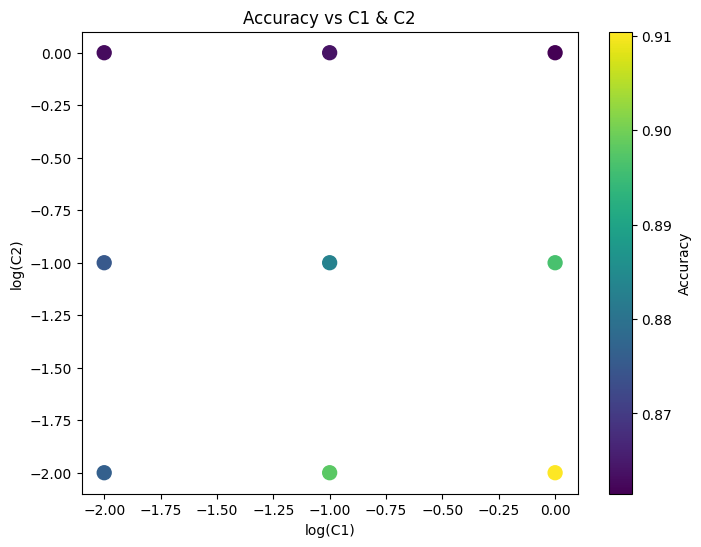

In [ ]:
# Visualisasi pengaruh parameter C1 dan C2
c1_vals, c2_vals, accuracies = zip(*results)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(np.log10(c1_vals), np.log10(c2_vals), c=accuracies, cmap='viridis', s=100)
plt.colorbar(scatter, label="Accuracy")
plt.xlabel("log(C1)")
plt.ylabel("log(C2)")
plt.title("Accuracy vs C1 & C2")
plt.show()



Top 10 fitur paling berpengaruh:
word: 0.5299
capitals_inside: 0.3341
is_all_caps: 0.2630
is_last: -0.2470
prefix-3: 0.2123
suffix-3: 0.2021
prev_word: 0.1324
next_word: 0.1258
prefix-2: 0.1254
suffix-2: 0.0976

Top 10 fitur yang paling tidak berpengaruh:
prefix-2: 0.1254
suffix-2: 0.0976
is_capitalized: -0.0976
word_shape: 0.0735
prefix-1: 0.0598
has_hyphen: -0.0578
is_first: 0.0303
is_all_lower: 0.0299
suffix-1: 0.0245
prev_word_is_capitalized: 0.0031


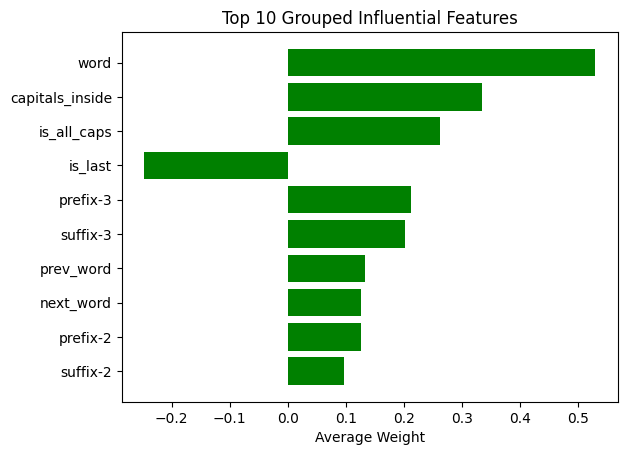

In [ ]:
from collections import defaultdict

def print_feature_importance_grouped(crf_model):
    feature_weights = crf_model.state_features_

    grouped_weights = defaultdict(list)
    for (feature_name, _), weight in feature_weights.items():
        feature_type = feature_name.split(":")[0]  
        grouped_weights[feature_type].append(weight)

    avg_weights = {feature: sum(weights) / len(weights) for feature, weights in grouped_weights.items()}

    sorted_avg_weights = sorted(avg_weights.items(), key=lambda x: abs(x[1]), reverse=True)

    print("\nTop 10 fitur paling berpengaruh:")
    for feature, weight in sorted_avg_weights[:10]:
        print(f"{feature}: {weight:.4f}")
    print("\nTop 10 fitur yang paling tidak berpengaruh:")
    for feature, weight in sorted_avg_weights[-10:]:
        print(f"{feature}: {weight:.4f}")

    top_features = [f[0] for f in sorted_avg_weights[:10]]
    top_weights = [f[1] for f in sorted_avg_weights[:10]]

    plt.barh(range(len(top_features)), top_weights, color='green')
    plt.yticks(range(len(top_features)), top_features)
    plt.xlabel("Average Weight")
    plt.title("Top 10 Grouped Influential Features")
    plt.gca().invert_yaxis()
    plt.show()

print_feature_importance_grouped(crf)

In [ ]:
import joblib
import nltk
# Load the trained CRF model
crf = joblib.load('best_crf_model.pkl')

def word_features(sentence, i):
    word = sentence[i]
    features = {
        'word': word,
        'is_first': i == 0,
        'is_last': i == len(sentence) - 1,
        'is_capitalized': word[0].upper() == word[0],
        'is_all_caps': word.upper() == word,
        'is_all_lower': word.lower() == word,
        'prefix-1': word[0],
        'prefix-2': word[:2],
        'prefix-3': word[:3],
        'suffix-1': word[-1],
        'suffix-2': word[-2:],
        'suffix-3': word[-3:],
        'prev_word': '' if i == 0 else sentence[i-1],
        'next_word': '' if i == len(sentence) - 1 else sentence[i+1],
        'has_hyphen': '-' in word,
        'is_numeric': word.isdigit(),
        'capitals_inside': word[1:].lower() != word[1:]
    }
    return features

nltk.download('punkt_tab')

In [ ]:
def predict_sentence_tags(crf_model, sentence):
    words = nltk.word_tokenize(sentence)
    features = [word_features(words, i) for i in range(len(words))]
    predicted_tags = crf_model.predict([features])[0]
    return list(zip(words, predicted_tags))


new_sentence = "Pan Karsa neked di tukad desa"
predicted_tags = predict_sentence_tags(crf, new_sentence)
print(predicted_tags)

WITH K-Fold Cross Validation

In [ ]:
import nltk
from sklearn.model_selection import train_test_split, KFold
from sklearn_crfsuite import metrics
import sklearn_crfsuite
import joblib
import numpy as np


def word_features(sentence, i):
    word = sentence[i][0]
    features = {
        'word': word,
        'is_first': i == 0,
        'is_last': i == len(sentence) - 1,
        'is_capitalized': word[0].upper() == word[0],
        'is_all_caps': word.upper() == word,
        'is_all_lower': word.lower() == word,
        'prefix-1': word[0],
        'prefix-2': word[:2],
        'prefix-3': word[:3],
        'suffix-1': word[-1],
        'suffix-2': word[-2:],
        'suffix-3': word[-3:],
        'prev_word': '' if i == 0 else sentence[i-1][0],
        'next_word': '' if i == len(sentence)-1 else sentence[i+1][0],
        'has_hyphen': '-' in word,
        'is_numeric': word.isdigit(),
        'capitals_inside': word[1:].lower() != word[1:],
        'word_shape': ''.join(['X' if c.isupper() else 'x' if c.islower() else 'd' if c.isdigit() else '-' for c in word]),
        'prev_word_is_capitalized': '' if i == 0 else sentence[i-1][0][0].isupper(),
    }
    return features



X = [[word_features(sentence, i) for i in range(len(sentence))] for sentence in corpus]
y = [[tag for _, tag in sentence] for sentence in corpus]

c1_values = [0.01, 0.1, 1.0]
c2_values = [0.01, 0.1, 1.0]

best_crf = None
best_accuracy = 0.0

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)


for c1 in c1_values:
    for c2 in c2_values:
        print(f"\nTraining model dengan c1={c1}, c2={c2}...")

        fold_accuracies = []

        for train_index, val_index in kf.split(X):
            X_train, X_val = [X[i] for i in train_index], [X[i] for i in val_index]
            y_train, y_val = [y[i] for i in train_index], [y[i] for i in val_index]

            crf = sklearn_crfsuite.CRF(
                algorithm='lbfgs',
                c1=c1,
                c2=c2,
                max_iterations=100,
                all_possible_transitions=True
            )

            crf.fit(X_train, y_train)

            y_pred = crf.predict(X_val)

            accuracy = metrics.flat_accuracy_score(y_val, y_pred)
            fold_accuracies.append(accuracy)

        avg_accuracy = np.mean(fold_accuracies)
        print(f"Rata-rata Akurasi untuk c1={c1}, c2={c2}: {avg_accuracy:.4f}")

        if avg_accuracy > best_accuracy:
            best_accuracy = avg_accuracy
            best_crf = crf
            joblib.dump(best_crf, "best_crf_model.pkl")
            print(f"Model baru disimpan dengan akurasi terbaik: {best_accuracy:.4f}")

print(f"\nModel terbaik ditemukan dengan parameter:")
print(f"c1={best_crf.c1}, c2={best_crf.c2} dengan akurasi terbaik: {best_accuracy:.4f}")



Training model dengan c1=0.01, c2=0.01...
Rata-rata Akurasi untuk c1=0.01, c2=0.01: 0.8793
Model baru disimpan dengan akurasi terbaik: 0.8793

Training model dengan c1=0.01, c2=0.1...
Rata-rata Akurasi untuk c1=0.01, c2=0.1: 0.8782

Training model dengan c1=0.01, c2=1.0...
Rata-rata Akurasi untuk c1=0.01, c2=1.0: 0.8615

Training model dengan c1=0.1, c2=0.01...
Rata-rata Akurasi untuk c1=0.1, c2=0.01: 0.8994
Model baru disimpan dengan akurasi terbaik: 0.8994

Training model dengan c1=0.1, c2=0.1...
Rata-rata Akurasi untuk c1=0.1, c2=0.1: 0.8857

Training model dengan c1=0.1, c2=1.0...
Rata-rata Akurasi untuk c1=0.1, c2=1.0: 0.8624

Training model dengan c1=1.0, c2=0.01...
Rata-rata Akurasi untuk c1=1.0, c2=0.01: 0.9060
Model baru disimpan dengan akurasi terbaik: 0.9060

Training model dengan c1=1.0, c2=0.1...
Rata-rata Akurasi untuk c1=1.0, c2=0.1: 0.8946

Training model dengan c1=1.0, c2=1.0...
Rata-rata Akurasi untuk c1=1.0, c2=1.0: 0.8590

Model terbaik ditemukan dengan parameter:
